In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import zipfile

In [2]:
# (Optional) Unzip the data
# with zipfile.ZipFile("data.zip","r") as zip_ref:
    # zip_ref.extractall(".")

In [3]:
# read the data
data = pd.read_csv('drug200.csv')

### Exploratory Data Analysis

In [4]:
# check the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
# check null values
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
# check the data statistics for numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [7]:
# check the categorical data statistics
data.describe(include=object).T

,count,unique,top,freq
Sex,200,2,M,104
BP,200,3,HIGH,77
Cholesterol,200,2,HIGH,103
Drug,200,5,DrugY,91


**Observations:**
- There are 200 rows and 6 columns in this dataset.
- *Age* and *Na_to_K* are numerical and the remaining are categorical variables.
- There is no missing value.

In [8]:
# check the first 5 rows of the dataset
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [9]:
# check the last 5 rows of the dataset
data.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


#### Univariate Analysis

<AxesSubplot: >

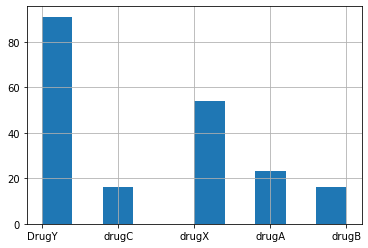

In [10]:
# check the distribution of the target variable
data['Drug'].hist()

In [11]:
# check the percentage of each drug in the dataset
data['Drug'].value_counts(normalize=True)

DrugY    0.455
drugX    0.270
drugA    0.115
drugC    0.080
drugB    0.080
Name: Drug, dtype: float64

**Observations:**
- There are 5 distinct types of drug.
- DrugY accounts for 45.5% of the dataset, followed by drugX of 27%, and drugA of 11.5% of the dataset
- The target variable is imbalanced, further grouping of data may be required.

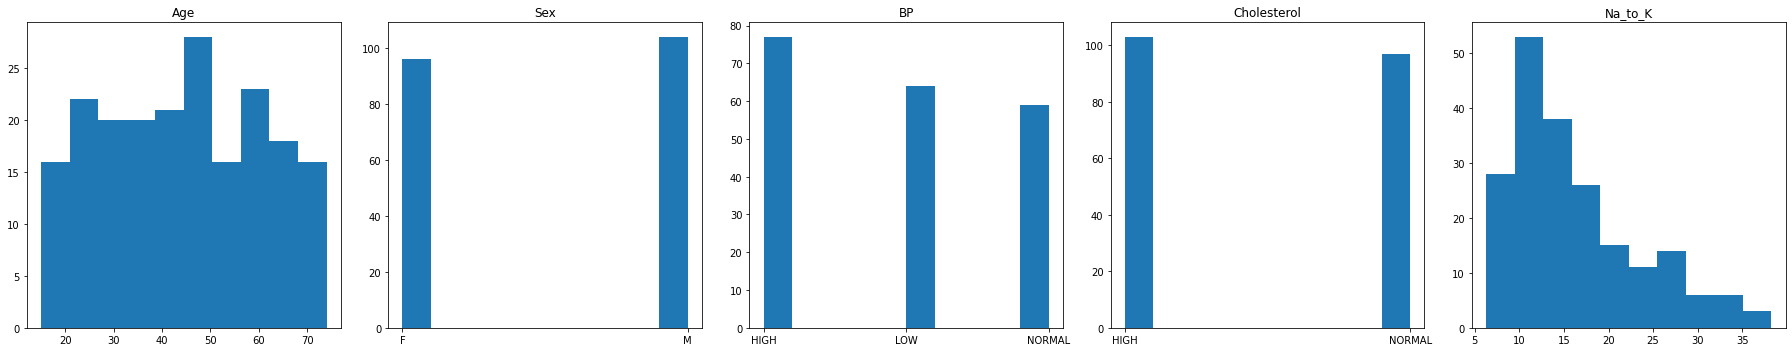

In [12]:
# check the distribution different features
fig, axs = plt.subplots(1, len(data.columns)-1, figsize=(25, 5))

# plot the histogram of each feature
for i, col in enumerate(data.columns):
    if col != 'Drug':
        axs[i].hist(data[col])
        axs[i].set_title(col)

plt.tight_layout() # to adjust the layout and spacing
plt.show() # to show the plot

**Observations:**
- The data includes people of different age.
- The female and male samples are about even.
- There are more subjects with high blood pressure levels.
- Around half of the subjects cholesterol level is high and the other half is normal.
- The distribution of sodium to potassium ratio in blood of the data is right-skewed, evidence of outliers.

Lower whisker:  6.269
Upper whisker:  31.876


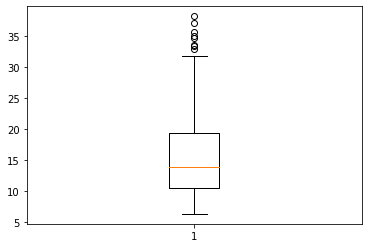

In [13]:
# Check the outliers in Na_to_K feature
B = plt.boxplot(data['Na_to_K'])

lower_whisker, upper_whisker = [item.get_ydata()[1] for item in B['whiskers']]

print('Lower whisker: ', lower_whisker)
print('Upper whisker: ', upper_whisker)

In [14]:
# check the number of data points beyond the upper whisker
data[data['Na_to_K'] > upper_whisker].shape[0]

8

### Multivariate Analysis

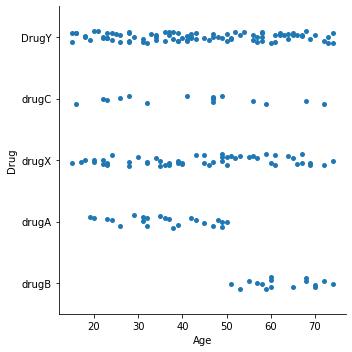

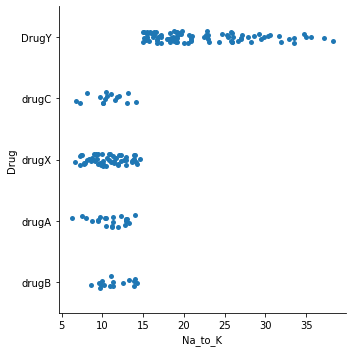

In [15]:
# check the distribution of the target variable with respect to numerical features
for col in data.select_dtypes(include='number').columns:
    if col != 'Drug':
        sns.catplot(x=col, y='Drug', data=data, kind='strip')
        plt.show()

**Observations:**
- *DrugA* is common to be prescribed to younger people with *Age* below 50.
- *DrugB* is common to be prescribed to elder people with *Age* above 50.
- The resultant *Na_to_K* ratio in blood is higher for taking *DrugY* compares to taking other drugs.
- The resultant *Na_to_K* ratio in blood for taking *DrugA*, *DrugB*, *DrugC* and *DrugX* is below 15.

<AxesSubplot: xlabel='Age', ylabel='Na_to_K'>

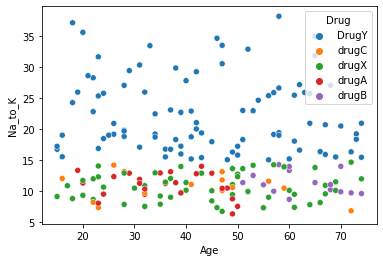

In [16]:
# Visualize the distribution of data by Age and Na_to_K
sns.scatterplot(x='Age', y='Na_to_K', hue='Drug', data=data)

<AxesSubplot: xlabel='Sex'>

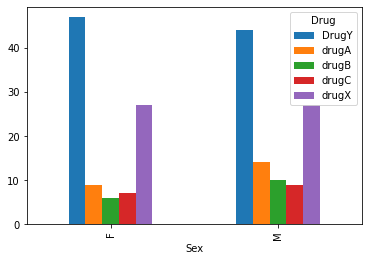

In [17]:
# Check the intake of different drugs by male and female
pivot_data_sex = pd.pivot_table(data=data, values='Age', index=['Sex'], columns=['Drug'], aggfunc='count')
pivot_data_sex.plot(kind='bar')

<AxesSubplot: xlabel='BP'>

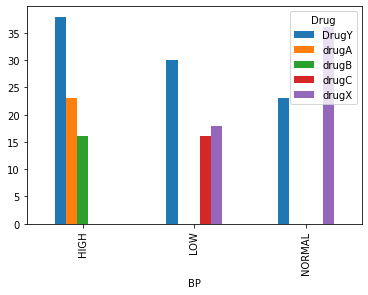

In [18]:
# Check the intake of different drugs by BP
pivot_data_bp = pd.pivot_table(data=data, values='Age', index=['BP'], columns=['Drug'], aggfunc='count')
pivot_data_bp.plot(kind='bar')

**Observations:**
- There is no subject taken *DrugC* and *DrugX* resulted in high blood pressure.
- Subjects taken *DrugY* were recorded across all blood pressure levels, taking *DrugY* may not have effect on blood pressure level.
- Prescription of *DrugA* and *DrugB* were recorded only among subjects who have high blood pressure. However, we cannot know whether taking *DrugA* and *DrugB* would result in high blood pressure, *DrugA* and *DrugB* are for treating high blood pressure, or the subjects recorded taking *DrugA* and *DrugB* simply happen to have high blood pressure.
- Subjects who taken *DrugC* were recorded to have low blood pressure.

<AxesSubplot: xlabel='Cholesterol'>

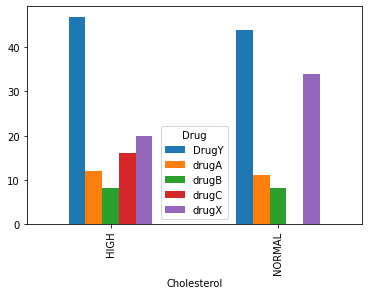

In [19]:
# Check the intake of different drugs by Cholesterol
pivot_data_chol = pd.pivot_table(data=data, values='Age', index=['Cholesterol'], columns=['Drug'], aggfunc='count')
pivot_data_chol.plot(kind='bar')

**Observations:**
- The observed Cholesterol levels are only being High and Normal.
- There is no subject with normal Cholesterol level who has taken *DrugC*.

**EDA Summary:**
1. The shape of this dataset is (200, 6). Columns *Age* and *Na_to_K* are numerical, and the remaining columns are catergorical.
2. Conversion of data from categorical to numerical is required.
3. 45.5% of the drug is *DrugY*, grouping of the remaining drugs may be required to yield a more balanced dataset.
4. The distribution of *Na_to_K* is right-skewed, removal of outliers is required.
5. *Age* and *Na_to_K* are important features in determining the drug taken by the subject. While *Sex* does not provide much predictive power.
6. Normalization of features is necessary for building a more robust model.

### Data Preprocessing

In [20]:
# Dropping the outliers
data = data[data['Na_to_K'] <= upper_whisker]

In [21]:
# Dropping the Sex feature
data.drop(columns='Sex', inplace=True)

In [22]:
# Transform the categorical features into numerical features
transformation = {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}
data['BP'] = data['BP'].map(transformation)
data['Cholesterol'] = data['Cholesterol'].map(transformation)

In [23]:
# Normalize the features
scaler = MinMaxScaler()
data[['Age', 'BP', 'Cholesterol', 'Na_to_K']] = scaler.fit_transform(data[['Age', 'BP', 'Cholesterol', 'Na_to_K']])

In [24]:
# Separate data for drug other than DrugY
data_other = data[data['Drug'] != 'DrugY']
data_other.reset_index(drop=True, inplace=True)

In [25]:
# Replace entries in Drug column that are not DrugY with others
data.loc[data['Drug'] != 'DrugY', 'Drug'] = 'DrugOthers'

In [26]:
# Split the data into train and test
X = data.drop(columns='Drug')
y = data['Drug']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

### Model Building - k-Nearest Neighbors for DrugY

We will try to build a model using k-Nearest Neighbors algorithm.

In [27]:
# Import libraries for machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

k =  1 , Train_Accuracy =  1.0
k =  1 , Val_Accuracy =  0.9827586206896551 

k =  2 , Train_Accuracy =  0.9477611940298507
k =  2 , Val_Accuracy =  0.9655172413793104 

k =  3 , Train_Accuracy =  0.9776119402985075
k =  3 , Val_Accuracy =  0.9827586206896551 

k =  4 , Train_Accuracy =  0.9402985074626866
k =  4 , Val_Accuracy =  0.9827586206896551 

k =  5 , Train_Accuracy =  0.9626865671641791
k =  5 , Val_Accuracy =  0.9482758620689655 

k =  6 , Train_Accuracy =  0.9104477611940298
k =  6 , Val_Accuracy =  0.9137931034482759 

k =  7 , Train_Accuracy =  0.9253731343283582
k =  7 , Val_Accuracy =  0.8793103448275862 

k =  8 , Train_Accuracy =  0.8880597014925373
k =  8 , Val_Accuracy =  0.896551724137931 

k =  9 , Train_Accuracy =  0.8955223880597015
k =  9 , Val_Accuracy =  0.8103448275862069 

k =  10 , Train_Accuracy =  0.8656716417910447
k =  10 , Val_Accuracy =  0.8620689655172413 

k =  11 , Train_Accuracy =  0.8731343283582089
k =  11 , Val_Accuracy =  0.8448275862068966 



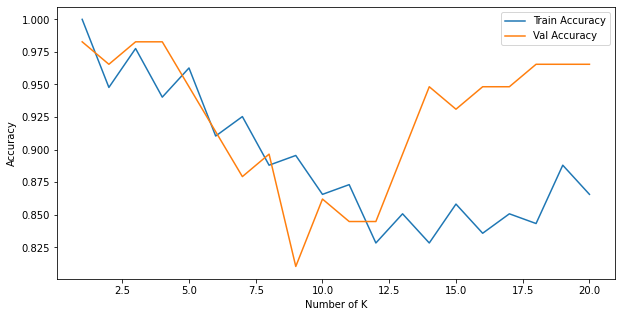

In [28]:
train_accuracy = []
val_accuracy = []

# We will try to find the best value of k
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print('k = ', k, ', Train_Accuracy = ', knn.score(X_train, y_train))
    print('k = ', k, ', Val_Accuracy = ', knn.score(X_val, y_val), '\n')
    train_accuracy.append(knn.score(X_train, y_train))
    val_accuracy.append(knn.score(X_val, y_val))

# Plot the accuracy for different values of k
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), train_accuracy, label='Train Accuracy')
plt.plot(range(1, 21), val_accuracy, label='Val Accuracy')
plt.legend()
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.show()

Validation accuracy start falling after k=4, so we will choose k=4 for our model.

In [29]:
# Define the kNN model
knn = KNeighborsClassifier(n_neighbors=4)

In [30]:
# fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [31]:
# Check the performance of kNN model on the training data
y_pred_train = knn.predict(X_train)

              precision    recall  f1-score   support

  DrugOthers       0.90      1.00      0.95        70
       DrugY       1.00      0.88      0.93        64

    accuracy                           0.94       134
   macro avg       0.95      0.94      0.94       134
weighted avg       0.95      0.94      0.94       134



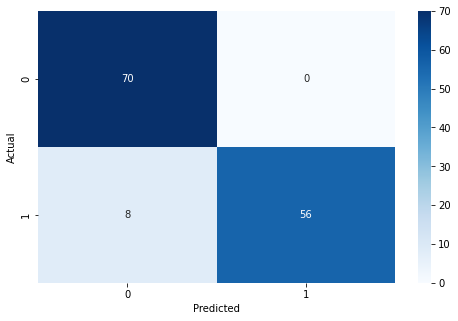

In [32]:
# Print the classification report and confusion matrix
print(classification_report(y_train, y_pred_train))

cm = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize= (8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

With k=4, the model is able to predict the drug taken by the subject with 94% in sample accuracy. Only 8 subjects taking *DrugY* were misclassified as taking other drugs.

In [33]:
# Create a new test set for prediction
X_train_2, X_test, y_train_2, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [34]:
# Check the performance of kNN model on the test data
y_pred_test = knn.predict(X_test)

              precision    recall  f1-score   support

  DrugOthers       0.88      1.00      0.94        30
       DrugY       1.00      0.86      0.92        28

    accuracy                           0.93        58
   macro avg       0.94      0.93      0.93        58
weighted avg       0.94      0.93      0.93        58



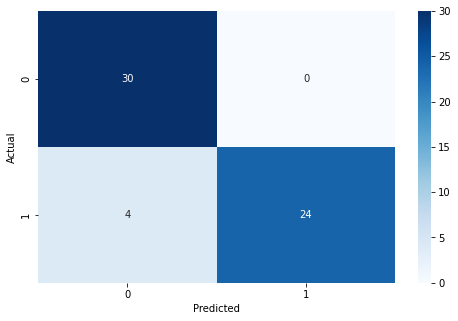

In [35]:
# Print the classification report and confusion matrix
print(classification_report(y_test, y_pred_test))

cm2 = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize= (8, 5))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

We created a new test set from the dataset, with our model, it is able to gives 93% accuracy in predicting the drug taken by the subject. However, this performance may be overestimated as the model was tested only on small dataset due to limited data source. And this dataset was partially came from the training set.

In [36]:
# Save the model
import pickle
pickle.dump(knn, open('knn_model_drug.sav', 'wb'))

### Model Building - k-Nearest Neighbors for other drugs

In [37]:
# Review the dataset for other drugs
data_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          109 non-null    float64
 1   BP           109 non-null    float64
 2   Cholesterol  109 non-null    float64
 3   Na_to_K      109 non-null    float64
 4   Drug         109 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.4+ KB


In [38]:
# Look at the first 5 rows
data_other.head()

,Age,BP,Cholesterol,Na_to_K,Drug
0,0.542373,0.0,1.0,0.266490,drugC
1,0.542373,0.0,1.0,0.150154,drugC
2,0.220339,0.5,1.0,0.059710,drugX
3,0.118644,0.5,1.0,0.091303,drugX
4,0.440678,0.0,1.0,0.186199,drugC


In [39]:
# Splitting the data into train and validation
X_other = data_other.drop(columns='Drug')
y_other = data_other['Drug']
X_train_other, X_val_other, y_train_other, y_val_other = train_test_split(X_other, y_other, test_size=0.3, random_state=20)

k =  1 , Train_Accuracy =  1.0
k =  1 , Val_Accuracy =  0.9696969696969697 

k =  2 , Train_Accuracy =  1.0
k =  2 , Val_Accuracy =  0.9696969696969697 

k =  3 , Train_Accuracy =  0.9868421052631579
k =  3 , Val_Accuracy =  0.9393939393939394 

k =  4 , Train_Accuracy =  0.9868421052631579
k =  4 , Val_Accuracy =  0.9696969696969697 

k =  5 , Train_Accuracy =  0.9868421052631579
k =  5 , Val_Accuracy =  0.9393939393939394 

k =  6 , Train_Accuracy =  1.0
k =  6 , Val_Accuracy =  0.9393939393939394 

k =  7 , Train_Accuracy =  1.0
k =  7 , Val_Accuracy =  0.9393939393939394 

k =  8 , Train_Accuracy =  0.9736842105263158
k =  8 , Val_Accuracy =  0.9090909090909091 

k =  9 , Train_Accuracy =  0.9605263157894737
k =  9 , Val_Accuracy =  0.9090909090909091 

k =  10 , Train_Accuracy =  0.9605263157894737
k =  10 , Val_Accuracy =  0.9393939393939394 

k =  11 , Train_Accuracy =  0.9210526315789473
k =  11 , Val_Accuracy =  0.8787878787878788 

k =  12 , Train_Accuracy =  0.90789473684210

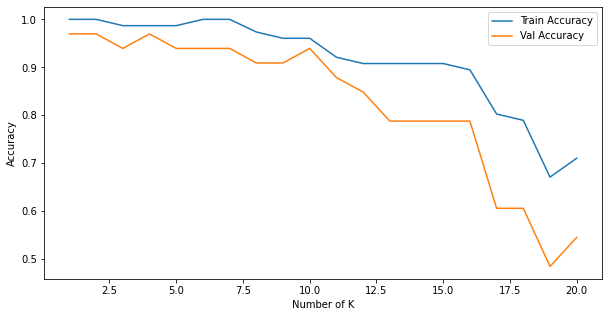

In [40]:
# Train the model with different values of k
train_accuracy = []
val_accuracy = []

for k in range(1, 21):
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(X_train_other, y_train_other)
    print('k = ', k, ', Train_Accuracy = ', knn2.score(X_train_other, y_train_other))
    print('k = ', k, ', Val_Accuracy = ', knn2.score(X_val_other, y_val_other), '\n')
    train_accuracy.append(knn2.score(X_train_other, y_train_other))
    val_accuracy.append(knn2.score(X_val_other, y_val_other))

# Plot the accuracy for different values of k
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), train_accuracy, label='Train Accuracy')
plt.plot(range(1, 21), val_accuracy, label='Val Accuracy')
plt.legend()
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.show()

As we have seen the accuracy of the model start deteriorating after k=4, we will try to build a model for the remaining drugs using k=4.

In [41]:
# Define the kNN model
knn2 = KNeighborsClassifier(n_neighbors=4)

In [42]:
# Fit the model
knn2.fit(X_train_other, y_train_other)

KNeighborsClassifier(n_neighbors=4)

In [43]:
# Check the performance of kNN model on the training data
y_pred_train_other = knn2.predict(X_train_other)

              precision    recall  f1-score   support

       drugA       1.00      0.92      0.96        13
       drugB       0.92      1.00      0.96        11
       drugC       1.00      1.00      1.00        10
       drugX       1.00      1.00      1.00        42

    accuracy                           0.99        76
   macro avg       0.98      0.98      0.98        76
weighted avg       0.99      0.99      0.99        76



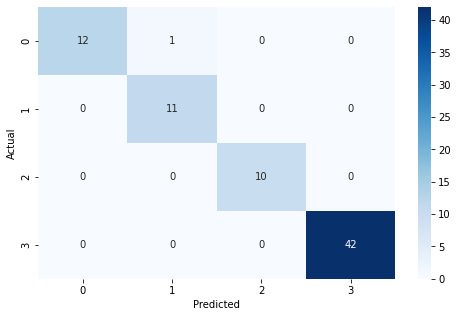

In [44]:
# Print the classification report and confusion matrix
print(classification_report(y_train_other, y_pred_train_other))

cm = confusion_matrix(y_train_other, y_pred_train_other)
plt.figure(figsize= (8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

With k=4, the model gives us an overall 99% in sample accuracy in classifying the 4 different drugs taken by the subject. With only 1 subject misclassified as taking *DrugB* when he actually took *DrugA*.

In [45]:
# Create a new test set for prediction
X_train_other_2, X_test_other_2, y_train_other_2, y_test_other_2 = train_test_split(X_other, y_other, test_size=0.3, random_state=0)

In [46]:
# Check the performance of kNN model on the new test data
y_pred_test_other_2 = knn2.predict(X_test_other_2)

              precision    recall  f1-score   support

       drugA       1.00      0.88      0.93         8
       drugB       0.75      1.00      0.86         3
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        19

    accuracy                           0.97        33
   macro avg       0.94      0.97      0.95        33
weighted avg       0.98      0.97      0.97        33



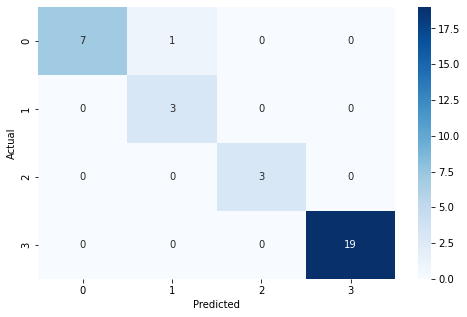

In [47]:
# Print the classification report and confusion matrix
print(classification_report(y_test_other_2, y_pred_test_other_2))

cm2 = confusion_matrix(y_test_other_2, y_pred_test_other_2)
plt.figure(figsize= (8, 5))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

We created another test set from the dataset, this time our model is able to produce 97% accuracy in classifying the drug taken by the subject, with only 1 being misclassified.

In [48]:
# Save knn2 model
pickle.dump(knn2, open('knn2_model_drug.sav', 'wb'))